# Australian Earthquake Hazard Distribution


In this notebook we demonstrate how to access Australian earthquake hazard archival catalogue.

* Access data via THREDDS
* Query earthquakes by magnitudes and plot distribution
* Get the mean, minimum and maximum magnitudes of earthquakes in each region
* Get the earthquake data in ACT area
* Plot up earthquake epic center across Australia

This example uses Australian Natural Hazards Data Archive Australian Earthquake Hazard Datasets. For more information, please visit the [data catalogue](https://geonetwork.nci.org.au/geonetwork/srv/eng/catalog.search#/metadata/f4746_9864_6013_2394) and note the terms of use.
   
---------

- Authors: NCI Virtual Research Environment Team
- Keywords: earthquake, geophysics
- Create Date: 2020-Sep
---

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
dat = pd.read_csv('http://dapds00.nci.org.au/thredds/fileServer/fj6/earthquake/AUSTCAT.MW.V0.11_public.csv',parse_dates=['DATESTR'])

In [3]:
df = pd.DataFrame(dat)
df

,DATESTR,DATENUM,TYPE,DEPENDENCE,LON,LAT,DEP,LOCSRC,PREFMW,PREFMWSRC,...,MX_ORIGML,MX_REVML,MX_REVMLSRC,MS2MW,mb2MW,ML2MW,ML2MWG,PREFMW.1,PREFMWSRC.1,COMM
0,1788-06-22 06:20:00,653228.2639,local,None,150.4000,-34.300,10.00,GG,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SW of Port Jackson, NSW"
1,1837-03-14 00:00:00,671024.0000,local,None,145.0000,-38.100,10.00,Garran,NaN,NaN,...,3.5,3.3,REV_ML,NaN,NaN,3.4,3.0,3.0,ML2MWG,"Melbourne, Vic"
2,1837-07-23 18:55:00,671155.7882,local,None,138.6000,-34.900,7.00,ADE,NaN,NaN,...,3.9,3.6,REV_ML,NaN,NaN,3.5,3.4,3.4,ML2MWG,"Adelaide, SA"
3,1840-03-31 06:30:00,672137.2708,local,None,138.6000,-34.900,7.00,ADE,NaN,NaN,...,2.7,2.5,REV_ML,NaN,NaN,3.0,2.4,2.4,ML2MWG,"Adelaide, SA"
4,1841-01-27 21:55:00,672439.9132,local,None,151.6000,-32.800,10.00,KMcC,NaN,NaN,...,4.9,4.6,REV_ML,NaN,NaN,4.1,4.3,4.3,ML2MWG,"Maitland, NSW"
5,1841-04-21 15:00:00,672523.6250,local,None,145.0000,-38.000,NaN,GG,NaN,NaN,...,4.0,3.7,REV_ML,NaN,NaN,3.6,3.5,3.5,ML2MWG,"Melbourne, Vic"
6,1841-10-30 00:00:00,672715.0000,local,None,145.0000,-38.000,10.00,GG,NaN,NaN,...,4.0,3.7,REV_ML,NaN,NaN,3.6,3.5,3.5,ML2MWG,"Melbourne, Vic"
7,1842-10-27 19:30:00,673077.8125,local,None,151.6000,-32.600,10.00,KMcC,NaN,NaN,...,5.3,4.9,REV_ML,NaN,NaN,4.6,4.6,4.6,ML2MWG,"Newcastle, NSW"
8,1847-04-28 06:30:00,674721.2708,local,None,144.8000,-37.800,10.00,RobUnd,NaN,NaN,...,4.0,3.7,REV_ML,NaN,NaN,3.6,3.5,3.5,ML2MWG,"Melbourne, Vic"
9,1848-09-13 06:30:00,675225.2708,local,None,138.6000,-34.900,7.00,ADE,NaN,NaN,...,3.0,2.8,REV_ML,NaN,NaN,3.2,2.6,2.6,ML2MWG,"Adelaide, SA"


In [4]:
df.index

RangeIndex(start=0, stop=45042, step=1)

Find out how many earthquakes with mangnitude 4.0 and above. 

In [5]:
bige=df[df.ML2MW>=4.0]
len(bige)

1797

<bound method DataFrame.info of                   DATESTR      DATENUM   TYPE  DEPENDENCE       LON     LAT  \
4     1841-01-27 21:55:00  672439.9132  local        None  151.6000 -32.800   
7     1842-10-27 19:30:00  673077.8125  local        None  151.6000 -32.600   
18    1855-09-16 17:12:00  677784.7167  local        None  144.8000 -38.700   
26    1859-11-21 18:50:00  679311.7847  local        None  145.2000 -40.700   
31    1868-06-18 13:58:00  682443.5819  local        None  151.6000 -32.800   
32    1868-08-29 18:50:00  682515.7847  local   Mainshock  147.0000 -37.000   
39    1871-06-08 04:10:00  683528.1736  local        None  148.1000 -35.300   
40    1872-01-03 12:15:00  683737.5104  local        None  148.1000 -35.500   
41    1872-01-30 13:40:00  683764.5694  local        None  138.8830 -34.067   
46    1872-10-18 08:53:00  684026.3701  local        None  150.0000 -33.700   
60    1880-02-03 06:30:00  686690.2708  local        None  146.4000 -43.000   
72    1883-08-28 16:

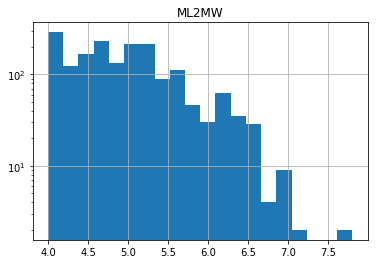

In [6]:
bige.hist('ML2MW', bins=20, log=True)
bige.info

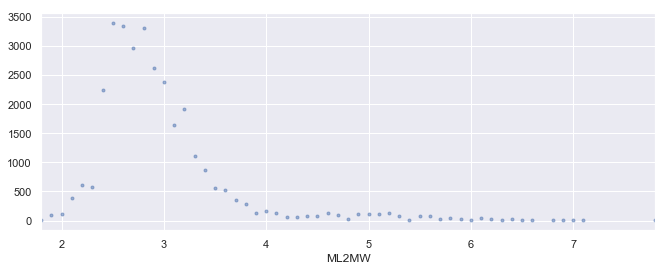

In [14]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
df.groupby(pd.Grouper('ML2MW'), axis=0)['DATESTR'].count().plot(marker='.', alpha=0.5, linestyle='None')

Do a distribution diagram across earthquake magnitudes.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12273e2e8>]],
      dtype=object)

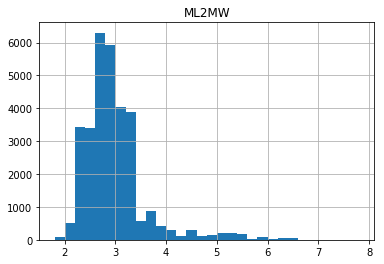

In [17]:
df.hist('ML2MW',bins=30)

What are the 20 largest earthquakes in Australia?

In [19]:
top20=df.nlargest(10,'ML2MW')
top20.info

<bound method DataFrame.info of                   DATESTR      DATENUM TYPE DEPENDENCE      LON    LAT    DEP  \
19397 1983-03-18 09:05:51  724353.3791  NaN        NaN  153.582 -4.892   90.4   
19398 1983-03-18 09:05:51  724353.3791  NaN        NaN  153.582 -4.892   90.4   
32651 1993-10-13 02:06:00  728215.0875  NaN        NaN  146.020 -5.889   21.0   
32652 1993-10-13 02:06:00  728215.0875  NaN        NaN  146.020 -5.889   21.0   
20757 1984-05-30 07:49:43  724792.3262  NaN        NaN  151.577 -4.843  161.0   
20758 1984-05-30 07:49:43  724792.3262  NaN        NaN  151.577 -4.843  161.0   
22219 1985-05-10 15:35:50  725137.6499  NaN        NaN  151.045 -5.599   22.0   
22220 1985-05-10 15:35:50  725137.6499  NaN        NaN  151.045 -5.599   22.0   
44728 2009-10-24 14:40:51  734070.6117  NaN        NaN  130.570 -6.100  154.6   
44729 2009-10-24 14:40:51  734070.6117  NaN        NaN  130.570 -6.100  154.6   

      LOCSRC  PREFMW PREFMWSRC  ...  MX_ORIGML MX_REVML  MX_REVMLSRC MS2MW  

Let's find out how many regions this catalogue has used.

In [14]:
region = df.COMM.str.rsplit(',').str.get(-1)
df['region']=region
unic=region.unique()
print(unic)

[' NSW' ' Vic' ' SA' 'Bass Strait' ' Tas' ' Qld' nan ' WA' 'Tasman Sea'
 ' Tasman Sea' 'West Victoria?' 'New Britain region'
 'Northwest of Australia' 'Tanimbar Islands region' 'Banda Sea'
 'New Guinea' 'Arafura Sea' 'Bali Sea' 'Flores Sea'
 'Bougainville - Solomon Islands region' 'Sulawesi' 'New Ireland region'
 'Jawa' 'Coral Sea' 'Java Sea' ' Indonesia' 'North of Macquarie Island'
 'Eastern New Guinea region' 'Near north coast of New Guinea'
 'Sumbawa region' ' Bass Strait' 'South of Jawa' 'Sumba region'
 'Near south coast of New Guinea' 'Seram' 'Bali region'
 'Aru Islands region' 'Irian Jaya region' 'Bismarck Sea' 'Flores region'
 ' NT' "D'Entrecasteaux Islands region" ' ACT' 'Timor region' 'Savu Sea'
 'Buru' 'Irian Jaya' ' NSW - Vic border' 'WA' 'Timor Trough'
 ' Eastern Bass Strait' ' PNG' 'NSW' 'South of Sumbawa' 'Halmahera'
 'South of Bali' 'Timor Sea' 'Southern Ocean' ' Indian Ocean'
 'West of Australia' 'South of Timor' " D'Entrecasteaux Is"
 'Western Australia' 'South of Aust

Series with MultiIndex to find out the largest earthquake at each depth.

In [21]:
df.groupby(['COMM','DEP']).ML2MW.max()

COMM                                DEP  
(Mareeba area), Qld                 14.10    2.5
100 km E of Mt Gascoyne, WA         0.00     NaN
100 km N of Woomera, SA             8.90     2.8
100 km W of Kalbarri, WA            0.00     3.3
101 km E of Oodnadatta, SA          7.18     3.1
101 km NW of Leigh Creek, SA        1.03     3.0
                                    10.18    3.0
101 km SW of Whyalla, SA            10.50    2.4
102 km SE of Zanthus, WA            14.00    3.0
103 km SW of Whyalla, SA            7.80     2.9
                                    9.20     2.7
104 km ENE of Marble Bar, WA        5.00     2.9
104 km SW of Kununurra, WA          5.00     2.7
104 km WNW of Warmun, WA            5.00     3.5
105 km N of Zanthus, WA             5.00     3.4
105 km SE of Oodnadatta, SA         8.50     3.1
105 km SW of Kununurra, WA          5.00     3.0
105 km from AWD (Awoonga Dam), Qld  0.00     2.6
106 km SE of Cocklebiddy, WA        5.00     3.8
106 km SE of Oodnadatta, SA

Get the mean, minimum and maximum magnitudes of earthquakes in each region.

In [13]:
df.groupby('region').ML2MW.agg(['mean', 'min', 'max'])

,mean,min,max
region,,,
WA,2.700000,2.7,2.7
ACT,2.825000,2.4,3.2
Australia,3.277778,2.8,4.1
Bass Strait,3.276190,2.6,5.4
Coral Sea,2.800000,2.1,3.5
D'Entrecasteaux Is,4.300000,4.3,4.3
E of Tas,2.700000,2.7,2.7
East Bass Strait,3.200000,3.2,3.2
East coast Tas,3.200000,3.2,3.2


Get the earthquake data in ACT area.

In [15]:
act_quakes = df[region==' ACT']
act_quakes

,DATESTR,DATENUM,TYPE,DEPENDENCE,LON,LAT,DEP,LOCSRC,PREFMW,PREFMWSRC,...,MX_REVML,MX_REVMLSRC,MS2MW,mb2MW,ML2MW,ML2MWG,PREFMW.1,PREFMWSRC.1,COMM,region
961,1940-09-21 14:54:46,708835.6214,local,None,149.200,-35.400,33.00,BurkeG,NaN,NaN,...,2.8,REV_ML,NaN,NaN,3.2,2.7,2.7,ML2MWG,"Canberra, ACT",ACT
2670,1963-11-26 18:11:08,717301.7577,local,None,149.100,-35.350,0.00,CAN,NaN,NaN,...,1.3,REV_ML,NaN,NaN,2.5,1.4,1.4,ML2MWG,"Canberra, ACT",ACT
2671,1963-11-26 18:38:50,717301.7770,local,None,149.100,-35.350,0.00,CAN,NaN,NaN,...,1.3,REV_ML,NaN,NaN,2.5,1.4,1.4,ML2MWG,"Canberra, ACT",ACT
4630,1968-03-15 16:44:28,718872.6976,local,None,149.100,-35.420,22.00,CAN,NaN,NaN,...,2.0,REV_ML,NaN,NaN,2.8,2.0,2.0,ML2MWG,"Tuggeranong, ACT",ACT
5657,1969-07-29 06:18:26,719373.2628,local,None,149.100,-35.130,0.00,CAN,NaN,NaN,...,2.0,REV_ML,NaN,NaN,2.8,1.9,1.9,ML2MWG,"Hall, ACT",ACT
6041,1970-03-23 11:18:30,719610.4712,local,None,149.090,-35.380,3.00,CAN,NaN,NaN,...,1.4,REV_ML,NaN,NaN,2.5,1.5,1.5,ML2MWG,"Mt Taylor, ACT",ACT
6167,1970-04-25 10:54:49,719643.4547,local,None,149.100,-35.430,18.00,CAN,NaN,NaN,...,3.0,REV_ML,NaN,NaN,3.2,2.8,2.8,ML2MWG,"Tuggeranong, ACT",ACT
6220,1970-05-14 16:34:22,719662.6905,local,None,149.170,-35.160,20.00,CAN,NaN,NaN,...,2.7,REV_ML,NaN,NaN,3.1,2.5,2.5,ML2MWG,"Hall, ACT",ACT
6629,1970-12-16 00:48:53,719878.0340,local,None,149.150,-35.400,17.00,CAN,NaN,NaN,...,1.1,REV_ML,NaN,NaN,2.4,1.3,1.3,ML2MWG,"Tuggeranong, ACT",ACT
6789,1971-02-28 20:56:03,719952.8723,local,Mainshock,149.050,-35.210,5.00,CAN,NaN,NaN,...,2.8,REV_ML,NaN,NaN,3.2,2.6,2.6,ML2MWG,"Canberra, ACT",ACT


In [16]:
aeq_time = pd.to_datetime(act_quakes['DATESTR'])
aeq_time

961     1940-09-21 14:54:46
2670    1963-11-26 18:11:08
2671    1963-11-26 18:38:50
4630    1968-03-15 16:44:28
5657    1969-07-29 06:18:26
6041    1970-03-23 11:18:30
6167    1970-04-25 10:54:49
6220    1970-05-14 16:34:22
6629    1970-12-16 00:48:53
6789    1971-02-28 20:56:03
6790    1971-02-28 20:57:37
6791    1971-02-28 21:04:30
7517    1971-09-13 05:38:15
10189   1974-03-31 09:25:57
10778   1975-01-20 14:42:17
10904   1975-03-09 12:22:46
10907   1975-03-10 12:51:39
10914   1975-03-11 10:41:27
10922   1975-03-13 16:54:33
10948   1975-03-23 12:47:08
11049   1975-05-21 14:14:58
11430   1975-09-20 15:10:59
14016   1978-07-15 17:00:38
22101   1985-04-07 12:55:28
34731   1995-10-10 09:10:41
38534   2000-10-23 01:20:25
39613   2002-02-22 18:29:02
40650   2003-06-12 06:28:57
40854   2003-10-03 22:25:09
41652   2005-01-02 01:56:43
43690   2008-06-17 09:34:25
43944   2008-12-12 02:28:00
Name: DATESTR, dtype: datetime64[ns]

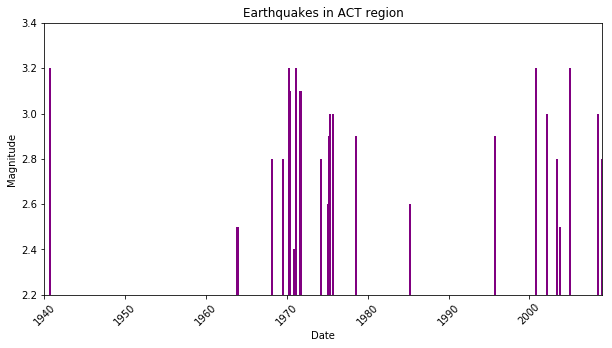

In [17]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig, ax = plt.subplots(figsize=(10, 5))

# Add x-axis and y-axis
for i in range(0,len(aeq_time)):
    ax.bar(aeq_time.values[i],
           act_quakes['ML2MW'].values[i],
           color='purple',
           width=100)

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Magnitude",
       title="Earthquakes in ACT region",
       xlim=["1940-01-01", "2008-12-31"],
       ylim=[2.2,3.4])

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

Create a basemap of Australia and its surrounding areas.

In [73]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf

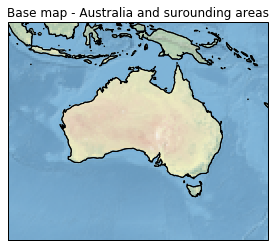

In [74]:
ax = plt.axes(projection = ccrs.PlateCarree())
ax.stock_img()
ax.add_feature(cf.COASTLINE)

extent = [100,165,-50,0]
ax.set_extent(extent)
ax.coastlines(resolution='50m')

ax.set_title("Base map - Australia and surrounding areas")
plt.show()

Add the location of earthquakes onto the basemap to show where those earthquakes are.

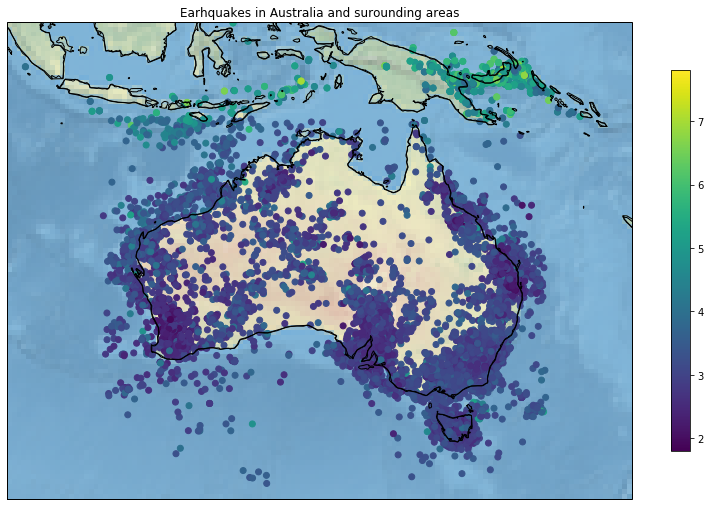

In [75]:
fig = plt.figure(figsize=(14,14))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.stock_img()
ax.add_feature(cf.COASTLINE)
extent = [100,165,-45,0]
ax.set_extent(extent)
ax.coastlines(resolution='50m')
ax.set_title("Earhquakes in Australia and surounding areas")
# new code
splot = ax.scatter(df.LON, df.LAT , c=df.ML2MW)
fig.colorbar(splot, shrink=0.5)
#ax.set_xlabel('lon')
ax.set_ylabel('Magnitude (ML)')
plt.show()

Bokeh version

In [21]:
from matplotlib.colors import Colormap
from matplotlib.cm import ScalarMappable
from bokeh.plotting import figure, show, output_notebook
output_notebook()

Loading BokehJS ...

In [25]:
p = figure(title = "Earthquakes", width=800, height=500,)
p.xaxis.axis_label = 'lon'
p.yaxis.axis_label = 'lat'

sm = ScalarMappable(cmap='Greens')
rgb = (255*sm.to_rgba(df['ML2MW'].values)[:,:3]).astype('int')
colors = ["#%02x%02x%02x" % tuple(c) for c in rgb]


p.scatter(df.LON, df.LAT,
       fill_color=colors, fill_alpha=0.6, line_color=None)


show(p)